### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

#### My GitHub repository.

https://github.com/Martines1988/LSE_DA_NHS_analysis

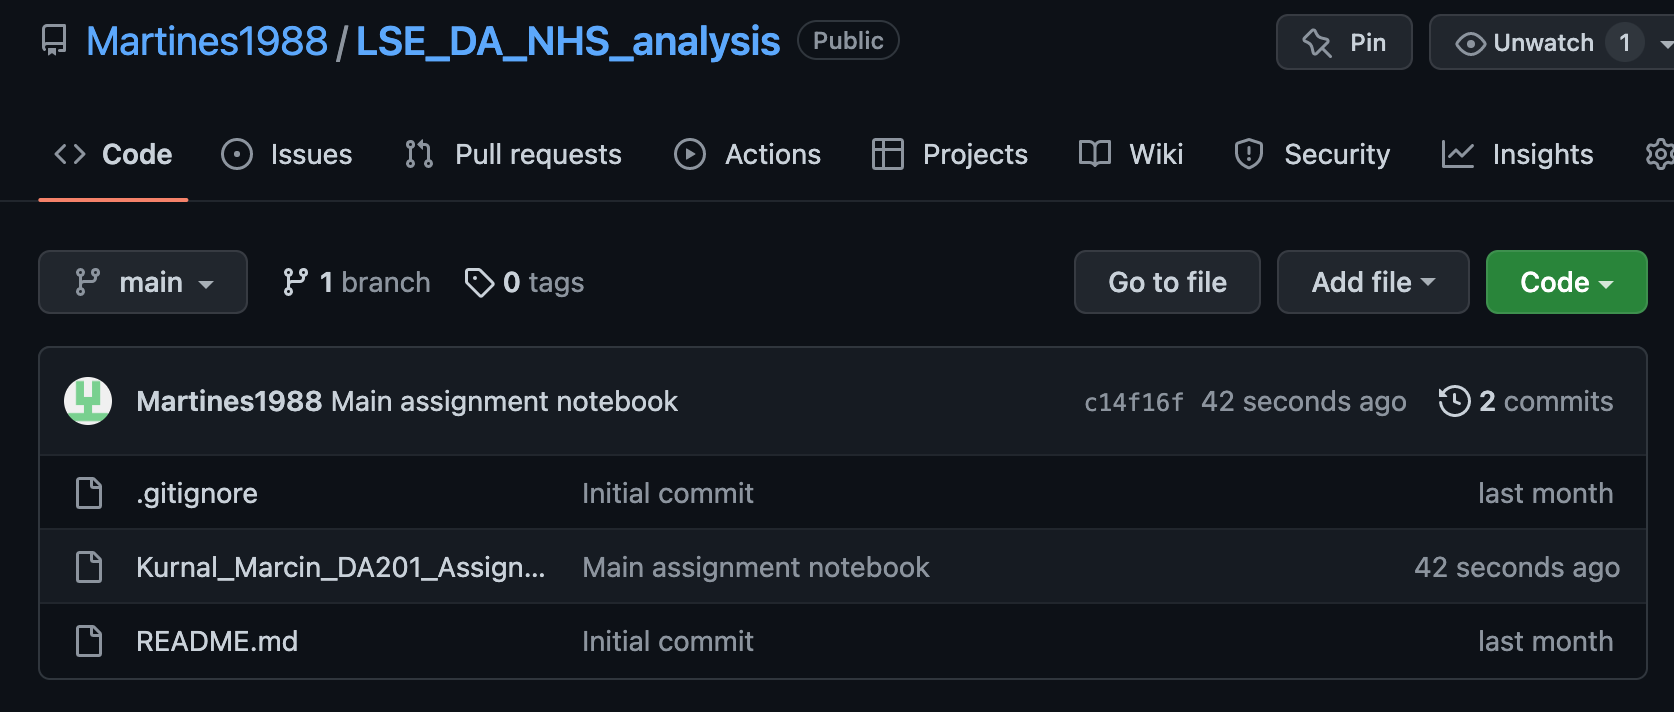


# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad=pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [3]:
# Determine whether there are missing values.

ad_na=ad[ad.isna().any(axis=1)]
ad_na.shape

#no missing values found

(0, 8)

In [4]:
# Determine the datatypes
ad.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [5]:
# Determine the descriptive statistics of the data set (for integer values only)

ad['count_of_appointments'].describe()

count    137793.000000
mean       1219.080011
std        1546.902956
min           1.000000
25%         194.000000
50%         696.000000
75%        1621.000000
max       15400.000000
Name: count_of_appointments, dtype: float64

In [6]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar=pd.read_csv('appointments_regional.csv')

# View the DataFrame.

ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [7]:
# Determine whether there are missing values.

ar_na=ar[ar.isna().any(axis=1)]
ar_na.shape

#no missing values

(0, 7)

In [8]:
# Determine the datatypes
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [9]:
# Determine the descriptive statistics of the data set (for integer values only)

ar['count_of_appointments'].describe()

count    596821.000000
mean       1244.601857
std        5856.887042
min           1.000000
25%           7.000000
50%          47.000000
75%         308.000000
max      211265.000000
Name: count_of_appointments, dtype: float64

In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc=pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [11]:
# Determine whether there are missing values.
nc_na=nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [12]:
# Determine the datatypes
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [13]:
# Determine the descriptive statistics of the data set.

nc['count_of_appointments'].describe()

count    817394.000000
mean        362.183684
std        1084.576600
min           1.000000
25%           7.000000
50%          25.000000
75%         128.000000
max       16590.000000
Name: count_of_appointments, dtype: float64

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [14]:
# Determine the number of locations.

print(ad['sub_icb_location_ons_code'].nunique())
print(ad['sub_icb_location_name'].nunique())
print(nc['sub_icb_location_name'].nunique())

print("Count of locations:", ad['sub_icb_location_code'].nunique(), "in actual_duration dataset ")
print("Count of locations:", nc['sub_icb_location_name'].nunique(), "in national_categories dataset ")


106
106
106
Count of locations: 106 in actual_duration dataset 
Count of locations: 106 in national_categories dataset 


**Question 2:** What are the five locations with the highest number of records?



In [15]:
# Determine the top eight locations based on record count.

ad_location=ad.groupby(['sub_icb_location_name'])
print(ad_location.size().sort_values(ascending=False).head(8))

sub_icb_location_name
NHS Kent and Medway ICB - 91Q                           1484
NHS North East London ICB - A3A8R                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Norfolk and Waveney ICB - 26A                       1484
NHS North West London ICB - W2U3Z                       1484
NHS Greater Manchester ICB - 14L                        1484
NHS Sussex ICB - 09D                                    1483
NHS Devon ICB - 15N                                     1483
dtype: int64


**Question 3:** What are the five locations with the lowest number of records?

In [16]:
# Determine the bottom eight locations based on record count.
ad_location.size().sort_values(ascending=False).tail(8)

sub_icb_location_name
NHS Cheshire and Merseyside ICB - 01X             1094
NHS Cheshire and Merseyside ICB - 01J             1076
NHS Cheshire and Merseyside ICB - 01T             1059
NHS Staffordshire and Stoke-on-Trent ICB - 05D    1051
NHS South Yorkshire ICB - 03L                     1028
NHS North East and North Cumbria ICB - 00P        1025
NHS South Yorkshire ICB - 02P                     1022
NHS Cheshire and Merseyside ICB - 01F             1013
dtype: int64

**Question 4:** How many service settings, context types, national categories, and appointment statuses are there?

In [17]:
# Determine the number of service settings.

print(nc.service_setting.unique())
nc['service_setting'].nunique()


['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


5

In [18]:
# Determine the number of context types.

print(nc.context_type.unique())
nc['context_type'].nunique()

['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping']


3

In [19]:
# Determine the number of national categories.

print(nc.national_category.unique())
nc['national_category'].nunique()

['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


18

In [20]:
# Determine the number of appointment status.

print(ar.appointment_status.unique())
ar['appointment_status'].nunique()

['Attended' 'DNA' 'Unknown']


3

# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

In [21]:
# Import the necessary graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(10, 8)})

# Set the plot style as white.
sns.set_style('white')

**Question 1:** Between what dates were appointments scheduled? 

In [22]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.

print(ad['appointment_date'].head(5))
ad['appointment_date'].dtypes

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


dtype('O')

In [23]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.

print(nc['appointment_date'].head(5))
nc['appointment_date'].dtypes

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


dtype('<M8[ns]')

In [24]:
# Change the date format of ad['appointment_date'].
ad["appointment_date"] = pd.to_datetime(ad["appointment_date"])

# View the DateFrame.
ad.head(5)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [25]:
# Change the date format of nc['appointment_date'].
nc["appointment_date"] = pd.to_datetime(nc["appointment_date"])

# View the DateFrame.
nc.head(5)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [26]:
# Determine the minimum and maximum dates in the ad DataFrame.

print(ad['appointment_date'].min())
print(ad['appointment_date'].max())



2021-12-01 00:00:00
2022-06-30 00:00:00


In [27]:
# Determine the minimum and maximum dates in the nc DataFrame.

print(nc['appointment_date'].min())
print(nc['appointment_date'].max())


2021-08-01 00:00:00
2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [28]:
# For each of these service settings, determine the number of records available for the period and the location. 

# Check for possible location settings
print(nc.service_setting.unique())

# Filter the nc dataframe for North West London only
nc_NWLondon=nc[nc['sub_icb_location_name'].str.contains("NHS North West London")]
nc_NWLondon

# Group by service settings, sort values and view the output
nc_servsett_NW=nc_NWLondon.groupby(['service_setting'])
nc_servsett_NW=nc_servsett_NW.sum().sort_values(by='count_of_appointments',ascending=False).reset_index()

# View the DataFrame
nc_servsett_NW

['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


,service_setting,count_of_appointments
0,General Practice,10432225
1,Unmapped,904234
2,Other,343642
3,Primary Care Network,240283
4,Extended Access Provision,222006


In [29]:
# Change display into millions and rename column heading

nc_servsett_NW['count_of_appointments']=nc_servsett_NW['count_of_appointments']/1000000
nc_servsett_NW.rename(columns={'count_of_appointments':'count_of_appointments (mln)'}, inplace= True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'General Practice'),
  Text(1, 0, 'Unmapped'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Primary Care Network'),
  Text(4, 0, 'Extended Access Provision')])

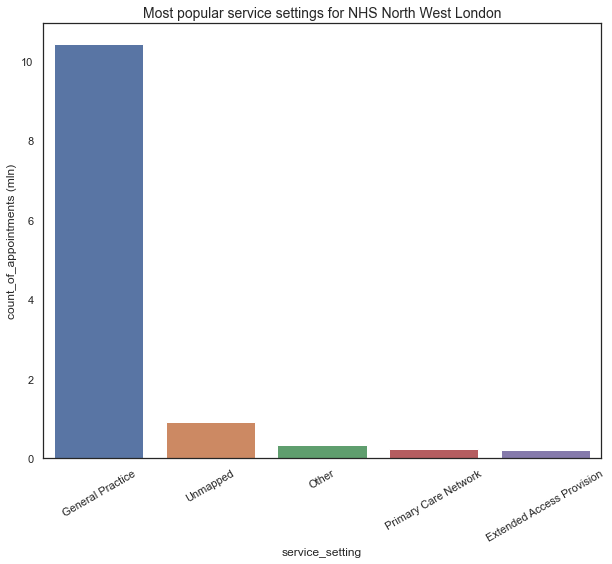

In [30]:
#Create barplot

sns.barplot(x='service_setting', y='count_of_appointments (mln)', data=nc_servsett_NW)

plt.title("Most popular service settings for NHS North West London", size=14)
plt.xticks(rotation=30)

**Question 3:** Which month had the highest number of appointments?

In [31]:
# check what format is appointment date currently (as we manipulated it previously)
ad.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [32]:
# Creare new column displaying appointment month in text format
ad['appointment_date_month']=ad['appointment_date'].dt.strftime('%B %Y')

# Group by to display month with highest number of appointment
ad_month=ad.groupby('appointment_date_month')[['count_of_appointments']]
ad_month=ad_month.sum().sort_values(by=['count_of_appointments'], ascending=False).reset_index()

ad_month

,appointment_date_month,count_of_appointments
0,March 2022,27170002
1,May 2022,25343941
2,June 2022,23715317
3,January 2022,23597196
4,February 2022,23351939
5,December 2021,22853483
6,April 2022,21948814


In [33]:
# Change the format of ad['appointment_date_month'] back to date format
ad_month['appointment_date_month'] = pd.to_datetime(ad_month['appointment_date_month'])


In [34]:
# Change display into millions and rename column heading

ad_month['count_of_appointments']=ad_month['count_of_appointments']/1000000
ad_month.rename(columns={'count_of_appointments':'count_of_appointments (mln)'}, inplace= True)

Text(0.5, 1.0, 'Months with highest numbers of appointments')

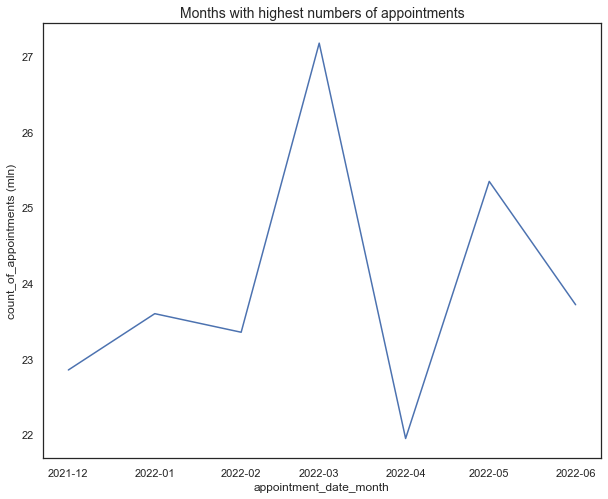

In [35]:
# Visualise
sns.lineplot(x='appointment_date_month', y='count_of_appointments (mln)', data=ad_month)
plt.title("Months with highest numbers of appointments", size=14)


**Question 4:** What was the total number of records per month?

In [36]:
# Total number of records per month.
# Data in nc database includes only 11  months, as such further manipulation of data year/
# month is not necessary

nc_month=nc.groupby(['appointment_month'])
nc_month.size().sort_values(ascending=False)

appointment_month
2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
dtype: int64

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [37]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(10, 8)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [38]:
# Aggregate on monthly level and determine the sum of records per month.

nc_setting=nc.groupby(['appointment_month','service_setting'])[['count_of_appointments']].sum().reset_index()

# Change display into millions and rename column heading

nc_setting['count_of_appointments']=nc_setting['count_of_appointments']/1000000
nc_setting.rename(columns={'count_of_appointments':'count_of_appointments (mln)'}, inplace= True)

# View output.
nc_setting


,appointment_month,service_setting,count_of_appointments (mln)
0,2021-08,Extended Access Provision,0.160927
1,2021-08,General Practice,21.575852
2,2021-08,Other,0.449101
3,2021-08,Primary Care Network,0.432448
4,2021-08,Unmapped,1.233843
5,2021-09,Extended Access Provision,0.187906
6,2021-09,General Practice,25.940821
7,2021-09,Other,0.527174
8,2021-09,Primary Care Network,0.530485
9,2021-09,Unmapped,1.336115


**Service settings:**

Text(0.5, 1.0, 'National service settings per month')

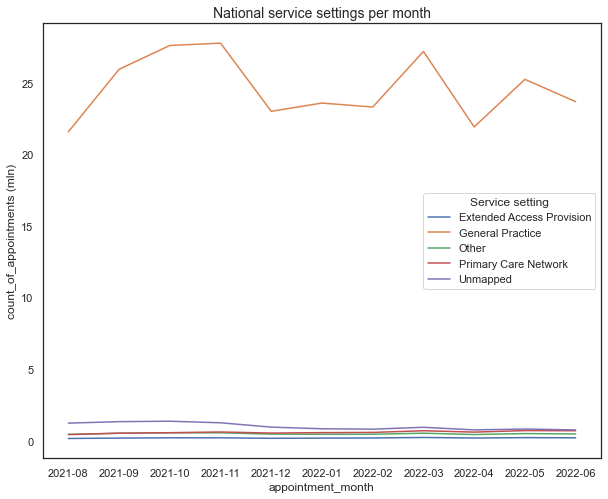

In [39]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.

sns.lineplot(x='appointment_month', y='count_of_appointments (mln)', hue='service_setting',\
             data=nc_setting, ci=None)

#Reaming legend

plt.legend(title="Service setting")
plt.title("National service settings per month", size=14)

**Context types:**

In [40]:
# Create a separate data set that can be used in future weeks. 

nc_context=nc.groupby(['appointment_month','context_type'])[['count_of_appointments']].sum().reset_index()

# Change display into millions and rename column heading

nc_context['count_of_appointments']=nc_context['count_of_appointments']/1000000
nc_context.rename(columns={'count_of_appointments':'count_of_appointments (mln)'}, inplace= True)

# View output.
nc_context.head(10)


,appointment_month,context_type,count_of_appointments (mln)
0,2021-08,Care Related Encounter,20.255235
1,2021-08,Inconsistent Mapping,2.363093
2,2021-08,Unmapped,1.233843
3,2021-09,Care Related Encounter,24.404251
4,2021-09,Inconsistent Mapping,2.782135
5,2021-09,Unmapped,1.336115
6,2021-10,Care Related Encounter,26.125201
7,2021-10,Inconsistent Mapping,2.811977
8,2021-10,Unmapped,1.366656
9,2021-11,Care Related Encounter,26.282778


Text(0.5, 1.0, 'National context types per month')

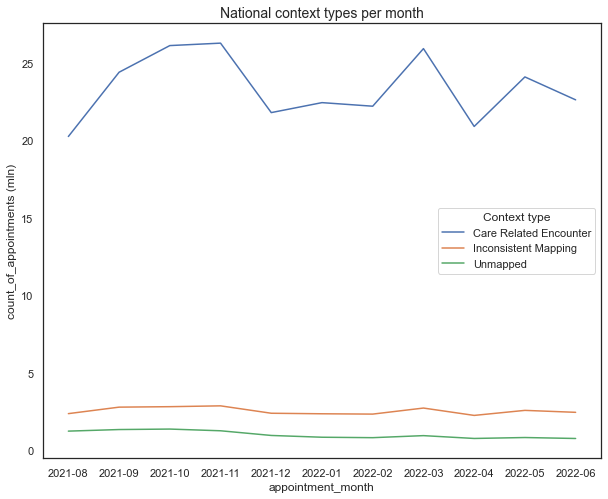

In [41]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.

sns.lineplot(x='appointment_month', y='count_of_appointments (mln)', hue='context_type',\
             data=nc_context, ci=None)

# renaming legend

plt.legend(title="Context type")
plt.title("National context types per month", size=14)

**National categories:**

In [42]:
# Create a separate data set that can be used in future weeks. 

nc_nc=nc.groupby(['appointment_month','national_category'])[['count_of_appointments']].sum().reset_index()

# Change display into millions and rename column heading

nc_nc['count_of_appointments']=nc_nc['count_of_appointments']/1000000
nc_nc.rename(columns={'count_of_appointments':'count_of_appointments (mln)'}, inplace= True)

# View output.
nc_nc.head(10)

,appointment_month,national_category,count_of_appointments (mln)
0,2021-08,Care Home Needs Assessment & Personalised Care...,0.029676
1,2021-08,Care Home Visit,0.047583
2,2021-08,Clinical Triage,3.704207
3,2021-08,General Consultation Acute,4.280920
4,2021-08,General Consultation Routine,7.756045
5,2021-08,Group Consultation and Group Education,0.005161
6,2021-08,Home Visit,0.165061
7,2021-08,Inconsistent Mapping,2.363093
8,2021-08,Non-contractual chargeable work,0.010775
9,2021-08,Patient contact during Care Home Round,0.031316


Text(0.5, 1.0, 'National categories types per month')

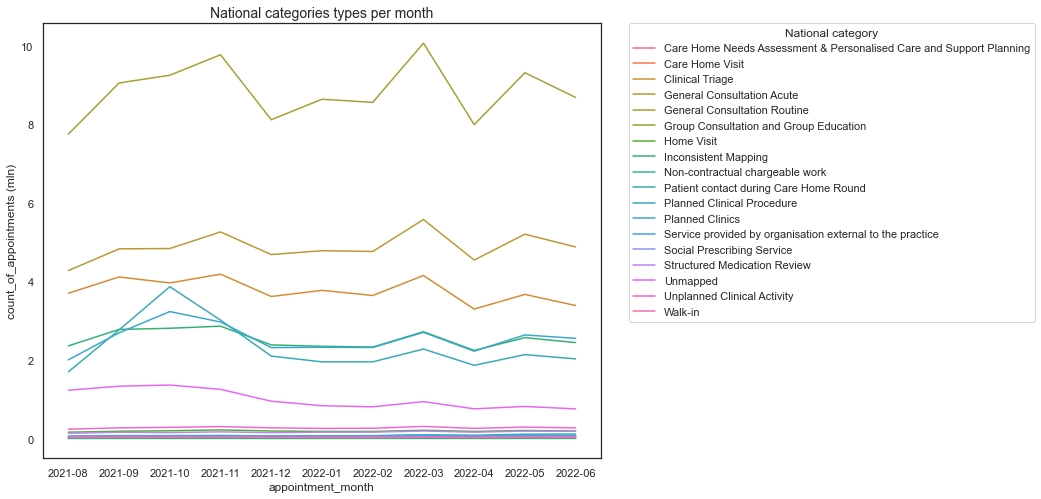

In [43]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.

sns.lineplot(x='appointment_month', y='count_of_appointments (mln)', hue='national_category',\
             data=nc_nc, ci=None)

# adjusting the legend location so it doesn't override the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="National category")

# title for the code
plt.title("National categories types per month", size=14)


### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [44]:
# Create a separate data set that can be used in future weeks. 

nc_s_new=nc.groupby(['appointment_month','appointment_date','service_setting'])[['count_of_appointments']].sum().reset_index()

# Change display into thousands and rename column heading

nc_s_new['count_of_appointments']=nc_s_new['count_of_appointments']/1000
nc_s_new.rename(columns={'count_of_appointments':'count_of_appointments (x000)'}, inplace= True)

# View output.
nc_s_new

,appointment_month,appointment_date,service_setting,count_of_appointments (x000)
0,2021-08,2021-08-01,Extended Access Provision,0.438
1,2021-08,2021-08-01,General Practice,3.411
2,2021-08,2021-08-01,Other,0.401
3,2021-08,2021-08-01,Primary Care Network,0.323
4,2021-08,2021-08-01,Unmapped,1.054
...,...,...,...,...
1665,2022-06,2022-06-30,Extended Access Provision,9.163
1666,2022-06,2022-06-30,General Practice,1124.374
1667,2022-06,2022-06-30,Other,23.115
1668,2022-06,2022-06-30,Primary Care Network,34.774


Text(0.5, 1.0, 'Summer 2021 appointments by service setting')

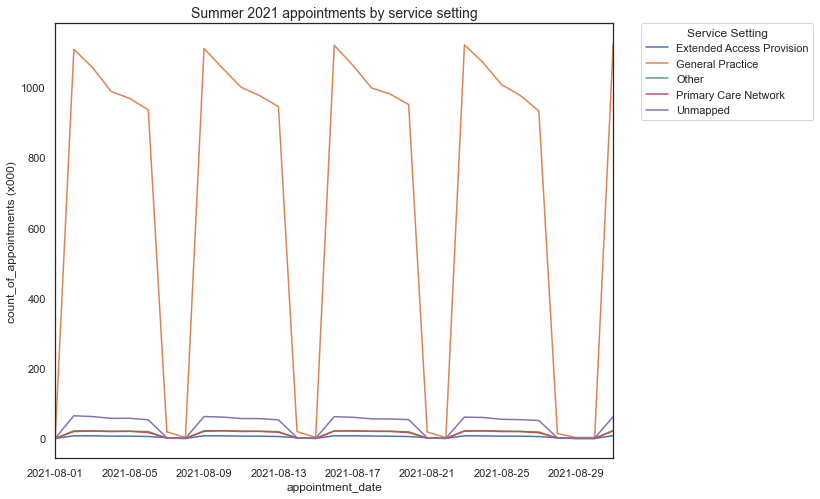

In [45]:
# Look at August 2021 in more detail to allow a closer look.

# Create dataframe only for August 2021
nc_s_summer=nc_s_new[nc_s_new['appointment_month']=='2021-08']

# Create a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments (x000)', hue='service_setting',\
             data=nc_s_summer, ci=None)


# Amend the legend to be legigble and not to override data 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Service Setting")

# Set the limits for x - axis as without it - it wasn't legible
plt.xlim('2021-08-01', '2021-08-31')
plt.title("Summer 2021 appointments by service setting", size=14)

**Autumn (October 2021):**

Text(0.5, 1.0, 'Autumn 2021 appointments by service setting')

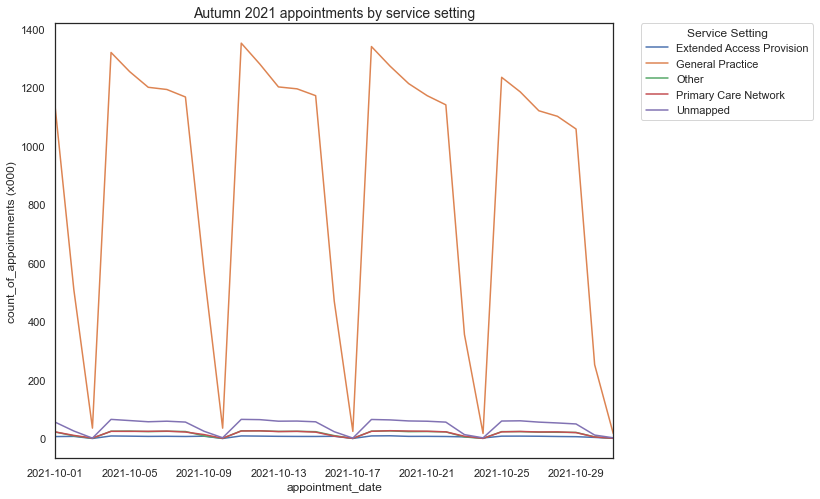

In [46]:
# Look at October 2021 in more detail to allow a closer look.

# Create dataframe only for October 2021
nc_s_autumn=nc_s_new[nc_s_new['appointment_month']=='2021-10']

# Create a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments (x000)', hue='service_setting',\
             data=nc_s_autumn, ci=None)


# Amend the legend to be legigble and not to override data 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Service Setting")

# Set the limits for x - axis as without it - it wasn't legible
plt.xlim('2021-10-01', '2021-10-31')
plt.title("Autumn 2021 appointments by service setting", size=14)


**Winter (January 2022):**

Text(0.5, 1.0, 'Winter 2022 appointments by service setting')

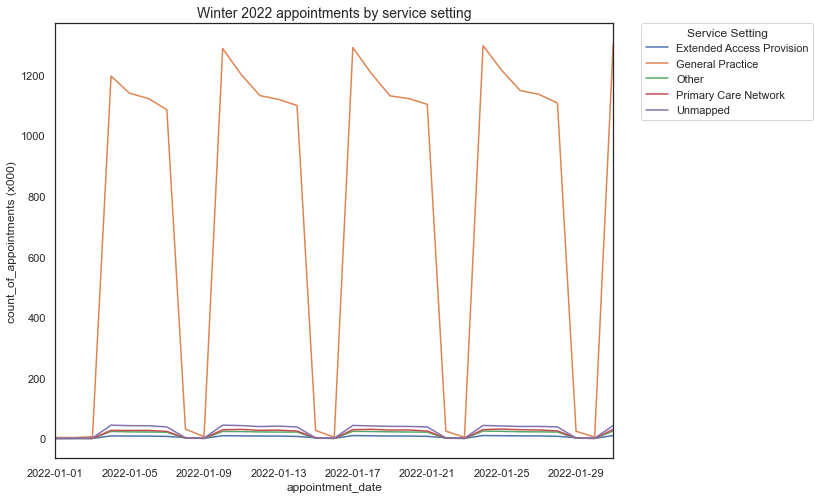

In [47]:
# Look at January 2022 in more detail to allow a closer look.

# Create dataframe only for January 2022
nc_s_winter=nc_s_new[nc_s_new['appointment_month']=='2022-01']

# Create a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments (x000)', hue='service_setting',\
             data=nc_s_winter, ci=None)


# Amend the legend to be legigble and not to override data 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Service Setting")

# Set the limits for x - axis as without it - it wasn't legible
plt.xlim('2022-01-01', '2022-01-31')
plt.title("Winter 2022 appointments by service setting", size=14)


**Spring (April 2022):**

Text(0.5, 1.0, 'Spring 2022 appointments by service setting')

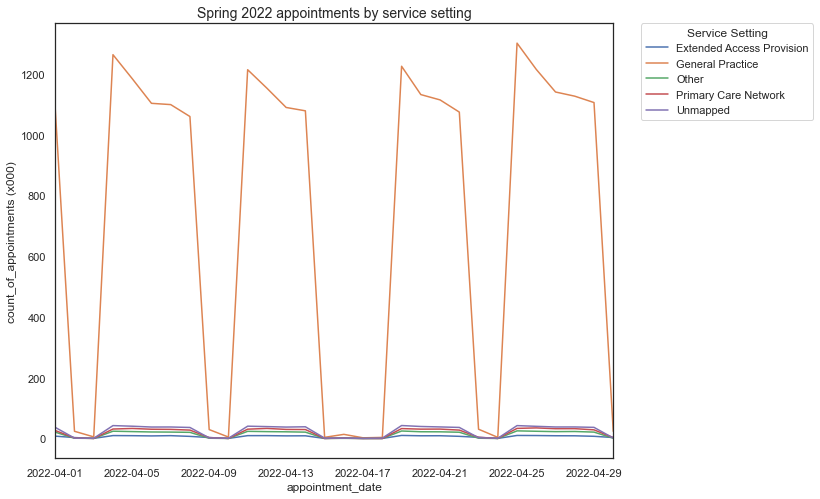

In [48]:
# Look at April 2022 in more detail to allow a closer look.

# Create dataframe only for April 2022
nc_s_spring=nc_s_new[nc_s_new['appointment_month']=='2022-04']

# Create a lineplot.

sns.lineplot(x='appointment_date', y='count_of_appointments (x000)', hue='service_setting',\
             data=nc_s_spring, ci=None)


# Amend the legend to be legigble and not to override data 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Service Setting")

# Set the limits for x - axis as without it - it wasn't legible
plt.xlim('2022-04-01', '2022-04-30')
plt.title("Spring 2022 appointments by service setting", size=14)



# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [49]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(10, 8)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [50]:
# Load the data set.

tweets=pd.read_csv('tweets.csv')

# View the DataFrame.

tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [51]:
# Explore the metadata.

print(tweets.describe())
tweets.info()

           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   twe

In [52]:
# Explore the data set - confirm missign values in tweets hashtag field as per info

tweets_na=tweets[tweets.isna().any(axis=1)]
tweets_na.shape

(167, 10)

In [53]:
# Explore further the tweet_favorite_count column

tweets['tweet_favorite_count'].value_counts()

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
28       1
7        1
8        1
42       1
10       1
11       1
12       1
13       1
14       1
17       1
18       1
20       1
9        1
Name: tweet_favorite_count, dtype: int64

In [54]:
# Explore further the tweet_retweet_count column

tweets['tweet_retweet_count'].value_counts()

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
208     12
6       12
35      10
11       6
37       6
10       5
53       5
44       4
150      4
63       4
76       3
41       3
85       3
207      3
62       3
68       3
24       2
23       2
16       2
72       2
78       2
13       1
303      1
14       1
15       1
19       1
20       1
40       1
48       1
49       1
54       1
57       1
79       1
107      1
169      1
39       1
Name: tweet_retweet_count, dtype: int64

In [55]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.


In [56]:
# Create a new DataFrame containing only the text.

tweets_text=tweets[['tweet_full_text', 'tweet_entities', 'tweet_entities_hashtags', 'tweet_metadata'\
                    , 'tweet_favorited', 'tweet_retweeted', 'tweet_lang']]

# View the DataFrame.

tweets_text.head()


,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_favorited,tweet_retweeted,tweet_lang
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",False,False,en
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",False,False,en
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",False,False,en
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",False,False,en
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",False,False,en


In [57]:
# Loop through the messages, and create a list of values containing the # symbol.

tags=[]

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

# Display the first 30 records.

tags[:30]

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare']

In [58]:
# import counter function
from collections import Counter

# count values in the series and create new dictionary
tags_count= Counter(tags)

# see the dictionary
tags_count

Counter({'#healthcare': 716,
         '#premisehealth': 5,
         '#hiring': 18,
         '🚨#new:🚨': 7,
         'look!\n\n#blogs': 1,
         '#digitaltransformation': 11,
         '#cybersecurity': 6,
         '#accounting': 1,
         '#finance': 5,
         'https://t.co/jrgqeqdme4\n.\n#firstcoastcna': 1,
         '#cnaexam': 1,
         '#cnaexampreparation': 1,
         '#jacksonville': 1,
         '#cnatraining': 2,
         '#nurse': 7,
         '#nursing': 10,
         '#nurselife': 4,
         '#nursepractitioner': 2,
         '#nurseproblems': 1,
         '#nursingschool': 2,
         '#disparities.': 2,
         '@karahartnett\n#healthcare': 2,
         '#alert': 2,
         '#insurance': 10,
         '#data\nhttps://t.co/h9hlamr7p9': 1,
         '❤️\n\n#healthcare': 2,
         '#hcldr': 3,
         '#qualitypatientcare': 2,
         '#jobs': 7,
         '#job': 38,
         '#ascp2022': 3,
         '#ascp100.': 3,
         '#healthsecretary': 1,
         '#ai,': 1,
  

In [59]:
# Convert the dictionary to a DataFrame in preparation for visualisation.

data=pd.DataFrame.from_dict(tags_count, orient='index', columns=['count']).reset_index()

# Rename the columns.
data.rename({'index':'word'}, axis=1, inplace=True)

# Sort in descending format
data=data.sort_values(by='count', ascending=False)

# See the top values
data.head()

#Save to CSV to analyse further in Excel
data.to_csv('data.csv', index= False)

In [60]:
# Ensure the count datatype is integer for data analysis
data.dtypes


word     object
count     int64
dtype: object

In [61]:
# Display records where the count is larger than 11.
data_11=data[data['count']>11]

#Sense checking the data
data_11.tail()

,word,count
374,#patientcare,13
222,#education,13
180,#doctor,12
204,#mentalhealth,12
55,#hospitals,12


Text(0.5, 1.0, 'Tags popularity')

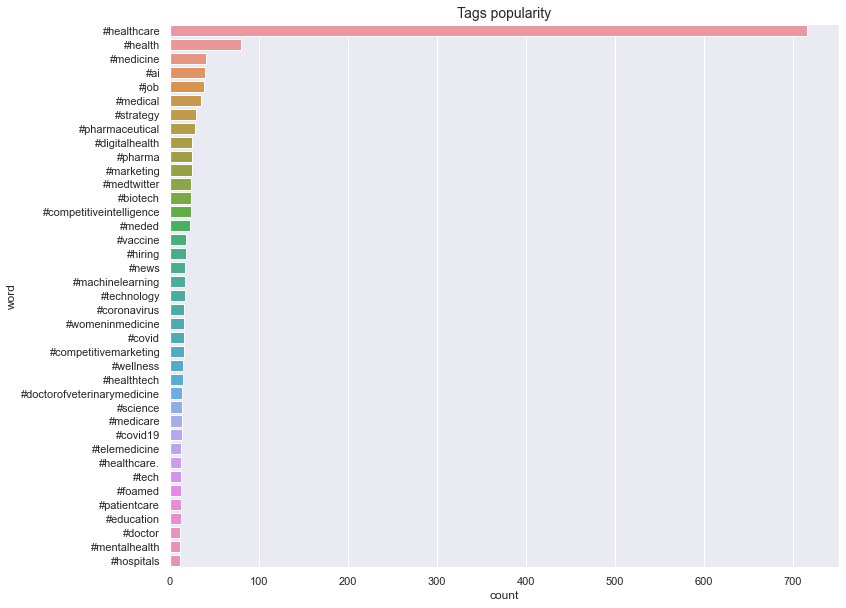

In [62]:
# Set new figure size to prevent illigible y label
sns.set(rc={'figure.figsize':(12, 10)})

# Create a Seaborn barplot indicating records with a count >10 records.
ax=sns.barplot(x='count', y='word', data=data_11)

plt.title("Tags popularity", size=14)

In [63]:
# Replacing cell values for similar meaning words in the original data database (manual grouping)

data_rpl=data

#Use replace function for names describing the same term
data_rpl=data_rpl.replace(['#machinelearning','#ai','#digitalhealth','#tech','#biotech','#healthtech','#bigdata',\
                           '#ehealth','#innovation'],'#technology')
data_rpl=data_rpl.replace('#meded','#education')
data_rpl=data_rpl.replace(['#covid19','#coronavirus','#pandemic','#corona'],'#covid')

#Use lambda function to capture variation of the same term
data_rpl['word']=data_rpl['word'].apply(lambda x: '#technology' if 'digital' in x.lower() else x) 
data_rpl['word']=data_rpl['word'].apply(lambda x: '#technology' if 'tech' in x.lower() else x) 
data_rpl['word']=data_rpl['word'].apply(lambda x: '#marketing' if 'marketing' in x.lower() else x) 
data_rpl['word']=data_rpl['word'].apply(lambda x: '#covid' if 'covid' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#monkeypox' if 'monkeypox' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#vaccine' if 'vaccine' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#pharmacy' if 'pharmac' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#job' if 'job' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#job' if 'hiring' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#education' if 'education' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#doctor' if 'doctor' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#mentalhealth' if 'mental' in x.lower() else x)
data_rpl['word']=data_rpl['word'].apply(lambda x: '#patientcare' if 'patient' in x.lower() else x)

#As word "healthcare" is used in multiple hashtags, it is run last, after everything else categorised
#This is to prevent e.g. healthcarejobs being categorised as #healthcare rather than jobs
data_rpl['word']=data_rpl['word'].apply(lambda x: '#healthcare' if 'healthcare' in x.lower() else x) 

#Aggregate across new names
data_agg=data_rpl.groupby(['word'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
print(data_agg.head(30))

data_agg.head(7)

                          word  count
568                #healthcare    905
1223               #technology    250
561                    #health     80
707                       #job     79
346                     #covid     76
764                 #marketing     53
952                  #pharmacy     43
800                  #medicine     41
442                 #education     38
938               #patientcare     37
424                    #doctor     37
777                   #medical     35
1287                  #vaccine     35
1191                 #strategy     30
951                    #pharma     25
327   #competitiveintelligence     24
806                #medtwitter     24
860                      #news     17
1348          #womeninmedicine     16
811              #mentalhealth     16
1329                 #wellness     15
793                  #medicare     14
1108                  #science     14
1227             #telemedicine     13
834                 #monkeypox     13
502         

,word,count
568,#healthcare,905
1223,#technology,250
561,#health,80
707,#job,79
346,#covid,76
764,#marketing,53
952,#pharmacy,43


In [64]:
# Display records where the count is larger than 11.
data_11_agg=data_agg[data_agg['count']>11]

#Sense checking the data
data_11_agg.tail()

,word,count
1108,#science,14
1227,#telemedicine,13
834,#monkeypox,13
502,#foamed,13
640,#hospitals,12


Text(0.5, 1.0, 'Tags popularity')

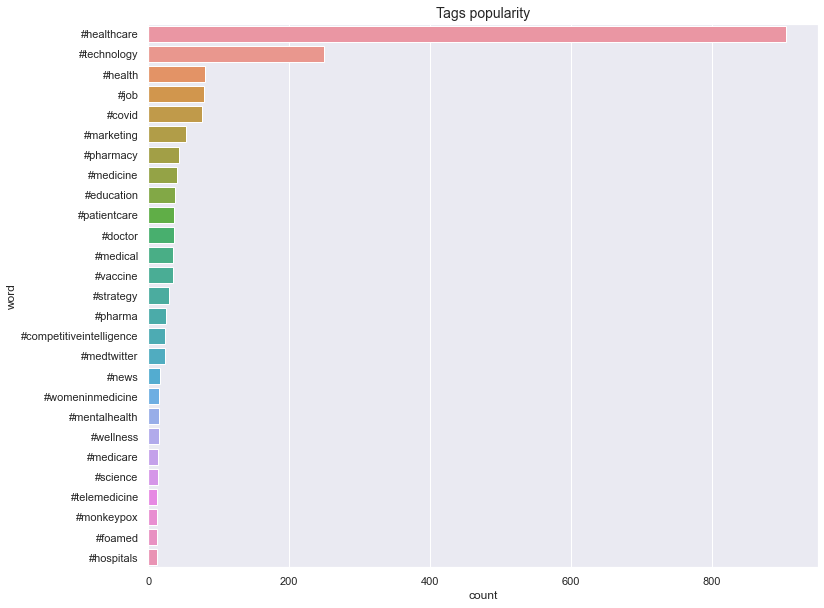

In [65]:
# Set new figure size to prevent illigible y label
sns.set(rc={'figure.figsize':(12, 10)})

# Create the barplot
ax=sns.barplot(x='count', y='word', data=data_11_agg)
plt.title("Tags popularity", size=14)


Text(0.5, 1.0, 'Tags popularity')

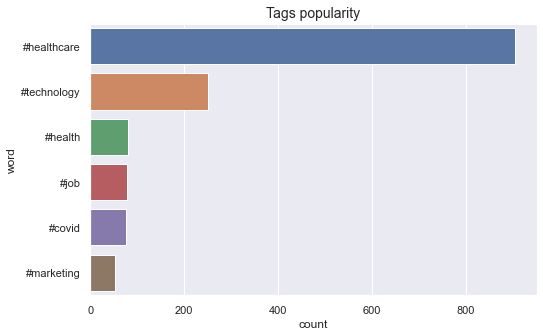

In [66]:
# Display records where the count is larger than 70.
data_50_agg=data_agg[data_agg['count']>50]

# Set new figure size to prevent illigible y label
sns.set(rc={'figure.figsize':(8, 5)})

# Create the barplot
ax=sns.barplot(x='count', y='word', data=data_50_agg)
plt.title("Tags popularity", size=14)

# 

# Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [67]:
# Prepare your workstation.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import percent formatter
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

# Load the appointments_regional.csv file.
ar=pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [68]:
# Print the min and max dates.

print(ar['appointment_month'].min())
print(ar['appointment_month'].max())

2020-01
2022-06


In [69]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_subset=ar[ar['appointment_month'] >= '2021-08']

ar_subset

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [70]:
# Create an aggregated data set to review the different features.

ar_agg=ar_subset[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode',\
                  'time_between_book_and_appointment','count_of_appointments']]

# View the DataFrame.

ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08,GP,Attended,Face-to-Face,1 Day,6553
3653,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,2390
3654,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,10547
3655,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,937
3656,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...
596816,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [71]:
# Determine the total number of appointments per month.

ar_agg_num=ar_agg.groupby(['appointment_month'])[['count_of_appointments']].sum().\
reset_index()

# Add a new column to indicate the average utilisation of services.

ar_df=ar_agg_num
ar_df=ar_df.assign(utilisation=lambda x: x.count_of_appointments / 30 / 1200000)

# View the DataFrame.
ar_df


,appointment_month,count_of_appointments,utilisation
0,2021-08,23852171,0.662560
1,2021-09,28522501,0.792292
2,2021-10,30303834,0.841773
3,2021-11,30405070,0.844585
4,2021-12,25140776,0.698355
5,2022-01,25635474,0.712097
6,2022-02,25355260,0.704313
7,2022-03,29595038,0.822084
8,2022-04,23913060,0.664252
9,2022-05,27495508,0.763764


In [72]:
# Set figure size.
sns.set(rc={'figure.figsize':(10, 8)})

# Set the plot style as white.
sns.set_style('white')

# Change display into millions, rename column heading and round down

ar_df['count_of_appointments']=ar_df['count_of_appointments']/1000000
ar_df.rename(columns={'count_of_appointments':'count_of_appointments (mil)'}, inplace= True)
ar_df['count_of_appointments (mil)']=ar_df['count_of_appointments (mil)'].round(decimals=2)

ar_df

,appointment_month,count_of_appointments (mil),utilisation
0,2021-08,23.85,0.662560
1,2021-09,28.52,0.792292
2,2021-10,30.30,0.841773
3,2021-11,30.41,0.844585
4,2021-12,25.14,0.698355
5,2022-01,25.64,0.712097
6,2022-02,25.36,0.704313
7,2022-03,29.60,0.822084
8,2022-04,23.91,0.664252
9,2022-05,27.50,0.763764


Text(0.5, 1.0, 'Appointments per month')

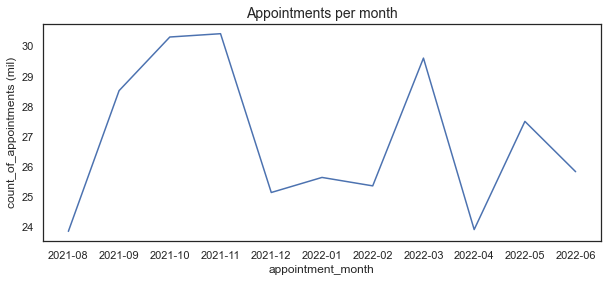

In [73]:
# Set figure size to make graphic representation better
sns.set(rc={'figure.figsize':(10, 4)})

# Set the plot style as white.
sns.set_style('white')

#Create a lineplot with Seaborn showing appointments per month

sns.lineplot(x='appointment_month', y='count_of_appointments (mil)', data=ar_df)
plt.title("Appointments per month", size=14)

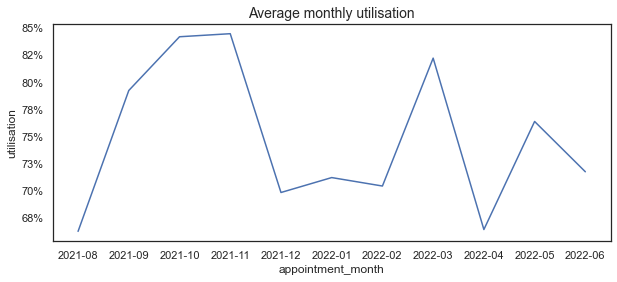

In [74]:
#Create a lineplot with Seaborn showing utilisation of appointments per month

ax=sns.lineplot(x='appointment_month', y='utilisation', data=ar_df)
plt.title("Average monthly utilisation", size=14)

#set y axis to display in %
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))


**Question 2:** How do the healthcare professional types differ over time?

In [75]:
# Create a new grouped data set with 'hcp_type' and appointment_month grouping

ar_subset
ar_subset_time=ar_subset.groupby(['appointment_month','hcp_type'])[['count_of_appointments']]\
.sum().reset_index()

# Change display into millions, rename column heading and round down

ar_subset_time['count_of_appointments']=ar_subset_time['count_of_appointments']/1000000
ar_subset_time.rename(columns={'count_of_appointments':'count_of_appointments (mil)'}, inplace= True)
ar_subset_time['count_of_appointments (mil)']=ar_subset_time['count_of_appointments (mil)'].round(decimals=2)

ar_subset_time.head(5)


,appointment_month,hcp_type,count_of_appointments (mil)
0,2021-08,GP,12.30
1,2021-08,Other Practice staff,10.80
2,2021-08,Unknown,0.76
3,2021-09,GP,14.49
4,2021-09,Other Practice staff,13.13


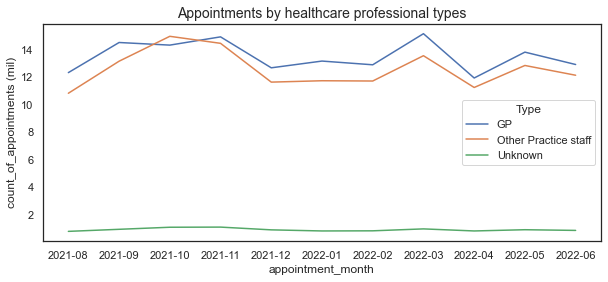

In [76]:
# Create a line plot to answer the question.

sns.lineplot(x='appointment_month', y='count_of_appointments (mil)', hue='hcp_type',data=ar_subset_time)

# Add title and format legend

plt.title("Appointments by healthcare professional types", size=14)
plt.legend(borderaxespad=0.5, title="Type")


**Question 3:** Are there significant changes in whether or not visits are attended?

In [77]:
# Create a new grouped data set with aggregation by 'hcp_type' and appointment month
ar_subset_visits=ar_subset.groupby(['appointment_month','appointment_status'])[['count_of_appointments']]\
.sum().reset_index()

# Create a new grouped data set with aggregation by appointment month only
ar_subset_visits2=ar_subset.groupby(['appointment_month'])[['count_of_appointments']].sum().reset_index()

# Merge 2 dataframes
ar_subset_visits=ar_subset_visits.merge(ar_subset_visits2, on='appointment_month')

# View merged DataFrame
ar_subset_visits.head(6)

,appointment_month,appointment_status,count_of_appointments_x,count_of_appointments_y
0,2021-08,Attended,22081765,23852171
1,2021-08,DNA,949137,23852171
2,2021-08,Unknown,821269,23852171
3,2021-09,Attended,25757066,28522501
4,2021-09,DNA,1321348,28522501
5,2021-09,Unknown,1444087,28522501


In [78]:
# Create new column called attendance (showing % by appointment status for given month) 
# by employing lambda function

ar_subset_visits=ar_subset_visits.assign(attendance=lambda x: 
                                         x.count_of_appointments_x / x.count_of_appointments_y)

# Filter for only attended appointment status

ar_subset_visits=ar_subset_visits[ar_subset_visits['appointment_status']=='Attended']
ar_subset_visits

,appointment_month,appointment_status,count_of_appointments_x,count_of_appointments_y,attendance
0,2021-08,Attended,22081765,23852171,0.925776
3,2021-09,Attended,25757066,28522501,0.903044
6,2021-10,Attended,27170506,30303834,0.896603
9,2021-11,Attended,27667665,30405070,0.909969
12,2021-12,Attended,22853483,25140776,0.909021
15,2022-01,Attended,23597196,25635474,0.920490
18,2022-02,Attended,23351939,25355260,0.920990
21,2022-03,Attended,27170002,29595038,0.918059
24,2022-04,Attended,21948814,23913060,0.917859
27,2022-05,Attended,25343941,27495508,0.921748


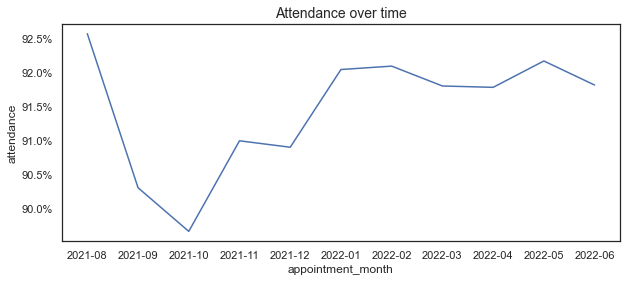

In [79]:
# Create a line plot to answer the question (show the attendance over time)
ax=sns.lineplot(x='appointment_month', y='attendance', data=ar_subset_visits)

# Add graph title
plt.title("Attendance over time", size=14)

# Set y axis to be shown in %
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=1))


**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [80]:
# Create a new grouped data set with 'appointment_mode' and appointment_month grouping
ar_subset
ar_subset_mode=ar_subset.groupby(['appointment_month','appointment_mode'])[['count_of_appointments']]\
.sum().reset_index()

# Used previously created visits2 aggregation to merge with newly created mode subset
ar_subset_mode=ar_subset_mode.merge(ar_subset_visits2, on='appointment_month')

# Create new column called mode_percent (showing % by appointment status for given month)
ar_subset_mode=ar_subset_mode.assign(mode_percent=lambda x: 
                                         x.count_of_appointments_x / x.count_of_appointments_y)

# Filter for two main modes for clarity of plotting (other modes are insignificant)
ar_subset_mode=ar_subset_mode[ar_subset_mode.appointment_mode.isin(['Face-to-Face','Telephone'])]

# View the dataframe
ar_subset_mode.head(5)

,appointment_month,appointment_mode,count_of_appointments_x,count_of_appointments_y,mode_percent
0,2021-08,Face-to-Face,13717325,23852171,0.575098
2,2021-08,Telephone,9149072,23852171,0.383574
5,2021-09,Face-to-Face,17266602,28522501,0.605368
7,2021-09,Telephone,10068770,28522501,0.353011
10,2021-10,Face-to-Face,19471561,30303834,0.642544


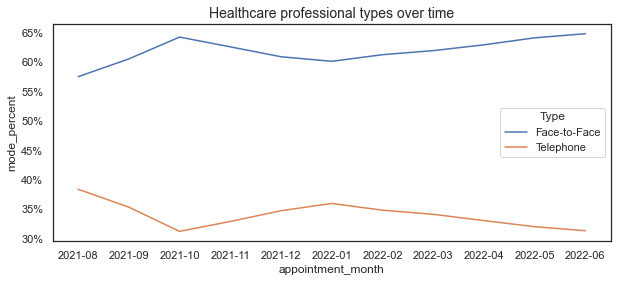

In [81]:
# Create a line plot to answer the question.
ax=sns.lineplot(x='appointment_month', y='mode_percent', hue='appointment_mode',data=ar_subset_mode)

# Add title and format legend
plt.title("Healthcare professional types over time", size=14)
plt.legend(borderaxespad=0.5, title="Type")

# Set y axis to be shown in %
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))

**Question 5:** Are there any trends in time between booking an appointment?

In [82]:
# Create a new grouped data set with 'appointment_mode' and appointment_month grouping
ar_subset
ar_subset_booktime=ar_subset.groupby(['appointment_month','time_between_book_and_appointment'])\
[['count_of_appointments']].sum().reset_index()

# Used previously created visits2 aggregation to merge with booktime subset
ar_subset_booktime=ar_subset_booktime.merge(ar_subset_visits2, on='appointment_month')

# Create new column called booking_time (showing % of total bookings for each time between book and appointment)
ar_subset_booktime=ar_subset_booktime.assign(booking_time=lambda x: 
                                         x.count_of_appointments_x / x.count_of_appointments_y)

# view the DataFrame
ar_subset_booktime.head(5)


,appointment_month,time_between_book_and_appointment,count_of_appointments_x,count_of_appointments_y,booking_time
0,2021-08,1 Day,2018319,23852171,0.084618
1,2021-08,15 to 21 Days,1453209,23852171,0.060926
2,2021-08,2 to 7 Days,4924960,23852171,0.206478
3,2021-08,22 to 28 Days,828866,23852171,0.034750
4,2021-08,8 to 14 Days,2889150,23852171,0.121127


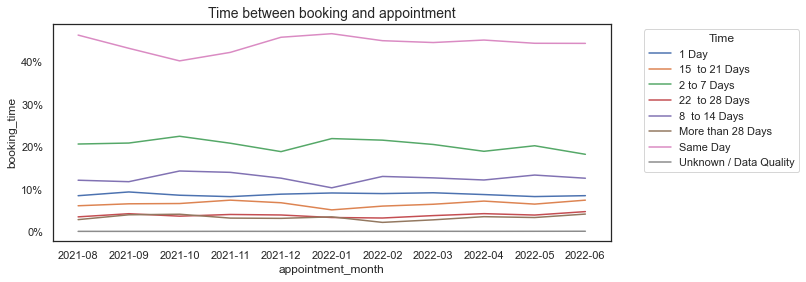

In [83]:
# Create a line plot to answer the question.
ax=sns.lineplot(x='appointment_month', y='booking_time', hue='time_between_book_and_appointment',\
                data=ar_subset_booktime)

# Add title and format legend
plt.title("Time between booking and appointment", size=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5, title="Time")

# Set y axis to be shown in %
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))


In [84]:
#Create new dataframe to show only same day appointmentets 
ar_subset_booktime_sameday=ar_subset_booktime
ar_subset_booktime_sameday=ar_subset_booktime_sameday[ar_subset_booktime_sameday\
                                                      ['time_between_book_and_appointment']=='Same Day']

#Select only appointment_month, time_between_book_and_appointment, booking_time columns
ar_subset_booktime_sameday=ar_subset_booktime_sameday[['appointment_month','time_between_book_and_appointment',\
                                                      'booking_time']]

#Format in %
ar_subset_booktime_sameday=ar_subset_booktime_sameday.style.format({'booking_time': "{:.2%}"})

#View the DataFrame
ar_subset_booktime_sameday

,appointment_month,time_between_book_and_appointment,booking_time
6,2021-08,Same Day,46.33%
14,2021-09,Same Day,43.22%
22,2021-10,Same Day,40.25%
30,2021-11,Same Day,42.25%
38,2021-12,Same Day,45.82%
46,2022-01,Same Day,46.66%
54,2022-02,Same Day,45.01%
62,2022-03,Same Day,44.58%
70,2022-04,Same Day,45.16%
78,2022-05,Same Day,44.40%


**Question 6:** How do the spread of service settings compare?

In [85]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc=pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [86]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_agg=nc.groupby(['appointment_month','service_setting'])[['count_of_appointments']].sum().reset_index()

# View the DataFrame.
nc_agg.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


In [87]:
# Change display into millions, rename column heading and round down

nc_agg['count_of_appointments']=nc_agg['count_of_appointments']/1000000
nc_agg.rename(columns={'count_of_appointments':'count_of_appointments (mil)'}, inplace= True)
nc_agg['count_of_appointments (mil)']=nc_agg['count_of_appointments (mil)'].round(decimals=2)

nc_agg.head()

,appointment_month,service_setting,count_of_appointments (mil)
0,2021-08,Extended Access Provision,0.16
1,2021-08,General Practice,21.58
2,2021-08,Other,0.45
3,2021-08,Primary Care Network,0.43
4,2021-08,Unmapped,1.23


In [88]:
# List the unique service settings for ease of filtering in subsequent cells
nc['service_setting'].unique()

array(['Primary Care Network', 'Other', 'General Practice', 'Unmapped',
       'Extended Access Provision'], dtype=object)

   appointment_month   service_setting  count_of_appointments (mil)
1            2021-08  General Practice                        21.58
6            2021-09  General Practice                        25.94
11           2021-10  General Practice                        27.61
16           2021-11  General Practice                        27.77
21           2021-12  General Practice                        23.01
26           2022-01  General Practice                        23.58
31           2022-02  General Practice                        23.31
36           2022-03  General Practice                        27.19
41           2022-04  General Practice                        21.92
46           2022-05  General Practice                        25.24
51           2022-06  General Practice                        23.68


<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments (mil)'>

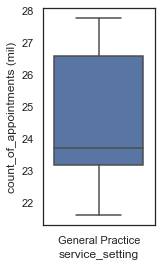

In [89]:
# Create a boxplot to investigate spread of service settings (GP only)
# Filter for GP for clarity of plotting
nc_agg_1=nc_agg[nc_agg.service_setting.isin(['General Practice'])]
print(nc_agg_1)

# Amend the size of the plot
sns.set(rc={'figure.figsize':(2, 4)})

# Set the plot style as white.
sns.set_style('white')

# Do the plot
sns.boxplot(x='service_setting', y='count_of_appointments (mil)', data=nc_agg_1)

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments (mil)'>

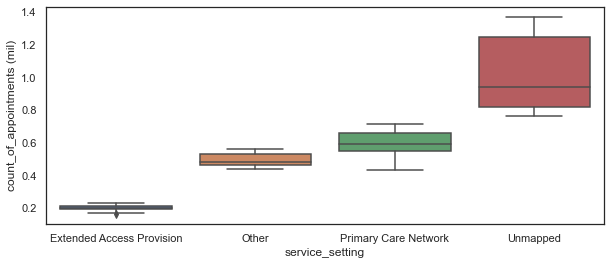

In [90]:
# Create a boxplot to investigate the service settings without GP.
# Filter for service settings other than GP
nc_agg_2=nc_agg[nc_agg.service_setting.isin(['Primary Care Network', 'Other', 'Unmapped',
       'Extended Access Provision'])]

# Amend the size of the plot
sns.set(rc={'figure.figsize':(10, 4)})

# Set the plot style as white.
sns.set_style('white')

# Do the plot
sns.boxplot(x='service_setting', y='count_of_appointments (mil)', data=nc_agg_2)

# 

### Provide a summary of your findings and recommendations based on the analysis.

##### Key recommendations:

-	People indicated interest in Technology within healthcare context. Reasons for that should be investigated further and NHS should consider more investment into technology.
-	Staffing level should be varied based on week of the day as early days of the week seems to be more popular in terms of appointments booked. This could be done for example by limiting holidays in early weekdays.
-	Staffing level should be investigated further in terms of division between GP and other practice staff. The data provided is not granular enough to judge if the split is correct.
-	Data quality is not perfect with presence of unknown and missing categories. NHS should create more categories or/and work on better of importance of filling of system data. 


